In [1]:
%run ../../init_python.py

In [2]:
df_exc = pd.read_hdf('data/exchanges.h5', key='data')

In [3]:
df_exc.head()

,conversation_id,exchange_id,created_at,creator_id,guest_user_id,host_user_id,finalized_at,canceled_at,start_on,end_on,...,user_cancellation_id,exchange_type,home_type,residence_type,capacity,country,region,department,city,k
0,46206392,68934690,2022-07-16,3621147,3621147,4033514,NaT,NaT,2022-08-01,2022-08-02,...,NaN,NON_RECIPROCAL,apartment,primary,4.0,FRA,Provence-Alpes-Côte D'azur,Alpes-Maritimes,Nice,1
1,47838047,70678856,2022-10-25,2595152,2595152,3980440,NaT,NaT,None,None,...,NaN,NON_RECIPROCAL,Home,primary,6.0,FRA,Provence-Alpes-Côte D'azur,Alpes-Maritimes,Nice,1
2,46453678,69197483,2022-08-01,689341,689341,4027070,NaT,NaT,2022-08-11,2022-08-15,...,NaN,NON_RECIPROCAL,Home,primary,10.0,FRA,Provence-Alpes-Côte D'azur,Alpes-Maritimes,Nice,1
3,41439268,63540384,2021-09-06,3528079,3528079,337677,NaT,NaT,2021-12-26,2022-01-02,...,NaN,NON_RECIPROCAL,apartment,secondary,9.0,FRA,Provence-Alpes-Côte D'azur,Alpes-Maritimes,Nice,1
4,42477400,64699420,2021-12-19,3749583,3749583,336788,NaT,NaT,2021-12-26,2021-12-30,...,NaN,NON_RECIPROCAL,apartment,secondary,6.0,FRA,Provence-Alpes-Côte D'azur,Alpes-Maritimes,Nice,1


In [4]:
df_subs = pd.read_hdf('data/subscription.h5', key='data')


In [5]:
df_subs.head()

,pk,subscription_date,user_id,renew,first_subscription_date,first_subscription,is_zombie,previous_inscription_date,referral,promotion,payment3x,payment2,payment3,country,region,department,city,inscription_diff_year,inscription_diff_day
0,2019-09-27_244,2019-09-27,244,0,2019-09-27,1,0,None,0,0,0,0,0,FRA,Île-De-France,Paris,Paris,NaN,NaN
1,2021-10-06_874,2021-10-06,874,1,2018-10-04,0,1,2019-10-10,0,0,0,0,0,FRA,Basse-Normandie,Manche,Jullouville,2.0,727.0
2,2021-09-03_1749,2021-09-03,1749,0,2007-02-10,0,0,2020-08-15,0,0,0,0,0,REU,Saint-Paul,None,Saint-Gilles Les Bains,1.0,384.0
3,2021-04-12_2505,2021-04-12,2505,1,2019-04-13,0,1,2019-04-13,0,0,0,0,0,FRA,Grand Est,Meurthe-Et-Moselle,Nancy,2.0,730.0
4,2019-01-15_3103,2019-01-15,3103,1,2012-08-06,0,0,None,0,0,0,0,0,FRA,Midi-Pyrénées,Tarn,Lavaur,NaN,NaN


In [8]:
df_subs['first_subscription_date']= pd.to_datetime(df_subs['first_subscription_date'])
df_subs['subscription_date']= pd.to_datetime(df_subs['subscription_date'])
df_subs['previous_subscription_date']= pd.to_datetime(df_subs['previous_inscription_date'])


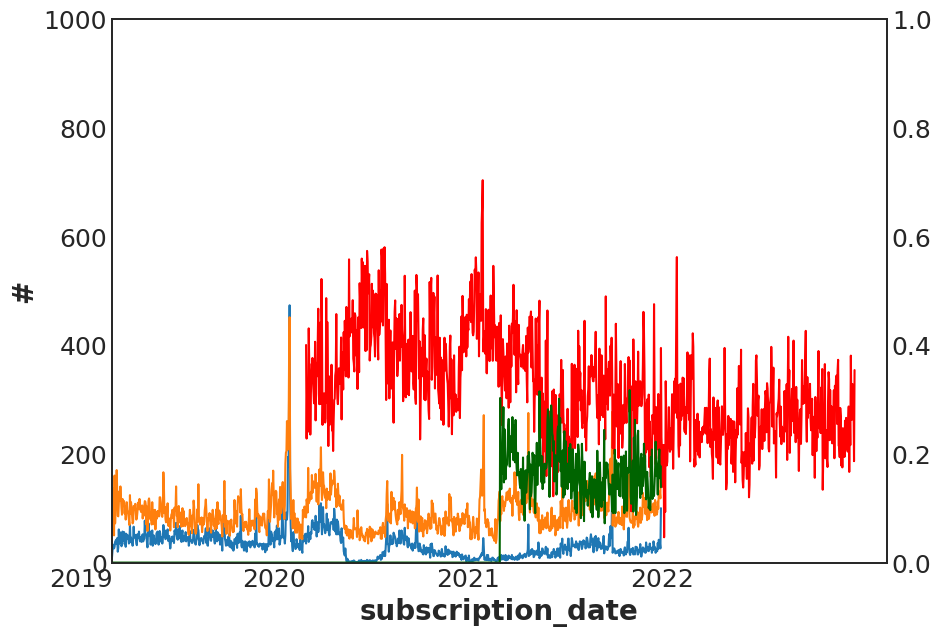

In [45]:


first_inscription =  df_subs.groupby('first_subscription_date')['user_id'].aggregate('nunique')
first_inscription.plot(label='FIRST inscription')

inscription =  df_subs.groupby('subscription_date')['user_id'].aggregate('nunique')
inscription.plot(label='inscription')
plt.xlabel('date')

plt.ylabel('#')
plt.ylim(0,1000)

df_subs_here = df_subs.copy()

df_subs_here['resiliation_date']=df_subs_here['subscription_date'] + np.timedelta64(365,'D')

resiliation =  1-df_subs_here.groupby('resiliation_date')['renew'].aggregate('mean')
resiliation.plot(label ='# churner', color= 'red',  secondary_y=True)
plt.xlabel('date')

zombies =  df_subs.groupby('subscription_date')['is_zombie'].aggregate('mean')
zombies.plot(label ='# zombies', color= 'darkgreen',  secondary_y=True)
plt.xlabel('date')


plt.xlim(np.datetime64('2018-12-31'), np.datetime64('2022-12-31'))
plt.ylim(0,1)

plt.show()

#plt.xlim(np.datetime64('2018-12-31'), np.datetime64('2022-12-31'))


In [60]:
len(df_subs[df_subs.inscription_diff_day>=300])

26855

In [65]:
len(df_subs[(df_subs.inscription_diff_day>=300)|(df_subs.inscription_diff_day.isna())])

95034

In [50]:
len(df_subs)

96119

In [57]:
(len(df_subs))/100000*100

96.119

In [ ]:
100 000 

In [ ]:
096 119